<a href="https://colab.research.google.com/github/jfink09/Deep-Learning/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_excel('cleaning.xlsx')
df['Eye_ODOS'] = df['Eye_ODOS'].replace({'OD': 1, 'OS': 0})
df

,New Age,Eye_ODOS,New K1,New K2,Axis F:,Astig F (D):,Axis B:,Astig B (D):,New Pachy,Axis Total,Astig Total (D):
0,25.0,1,43.6,43.6,10.6,0.0,7.5,0.1,556.0,7.500000,0.100000
1,25.0,0,43.4,43.6,78.8,0.3,171.1,0.1,546.0,77.653694,0.200483
2,27.0,1,43.2,43.9,150.9,0.7,34.8,0.1,517.0,154.426149,0.643578
3,27.0,0,43.3,43.6,14.5,0.2,151.9,0.2,507.0,173.200000,0.294439
4,56.0,1,43.2,44.4,95.2,1.2,169.9,0.3,561.0,99.805269,0.954078
...,...,...,...,...,...,...,...,...,...,...,...
19499,30.0,1,41.3,42.4,101.2,1.2,13.7,0.5,577.0,99.423666,0.703254
19500,30.0,0,41.1,42.4,74.1,1.3,173.9,0.4,575.0,69.965082,0.932877
19501,56.0,1,42.9,43.6,96.9,0.7,9.6,0.4,582.0,93.344837,0.304114
19502,56.0,0,43.4,44.1,60.2,0.7,171.2,0.4,582.0,43.396494,0.483569


In [ ]:
X = df.drop('Astig Total (D):', axis=1).values
y = df['Astig Total (D):'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
class RegressionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [ ]:
input_dim = X_train.shape[1]
hidden_dim = 32 # Was 16
output_dim = 1

model = RegressionModel(input_dim, hidden_dim, output_dim)

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
from sklearn.metrics import r2_score

num_epochs = 25000

# initialize lists to store loss and accuracy values
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train.unsqueeze(1))
    
    # calculate accuracy
    accuracy = r2_score(y_train.numpy(), outputs.detach().numpy())
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # append loss and accuracy values to lists
    train_loss.append(loss.item())
    train_accuracy.append(accuracy)
    
    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}, Train Accuracy: {:.4f}'.format(epoch+1, num_epochs, loss.item(), accuracy))

        # evaluate model on test data
        with torch.no_grad():
            model.eval()
            test_outputs = model(X_test)
            test_loss_value = criterion(test_outputs, y_test.unsqueeze(1))
            test_accuracy_value = r2_score(y_test.numpy(), test_outputs.detach().numpy())
            test_loss.append(test_loss_value.item())
            test_accuracy.append(test_accuracy_value)
            print('Test Loss: {:.4f}, Test Accuracy: {:.4f}'.format(test_loss_value.item(), test_accuracy_value))
            model.train()

Epoch [100/25000], Loss: 1.7343, Train Accuracy: -3.6562
Test Loss: 1.6734, Test Accuracy: -3.7077
Epoch [200/25000], Loss: 0.3106, Train Accuracy: 0.1662
Test Loss: 0.2976, Test Accuracy: 0.1628
Epoch [300/25000], Loss: 0.1582, Train Accuracy: 0.5754
Test Loss: 0.1525, Test Accuracy: 0.5710
Epoch [400/25000], Loss: 0.1017, Train Accuracy: 0.7268
Test Loss: 0.0992, Test Accuracy: 0.7209
Epoch [500/25000], Loss: 0.0677, Train Accuracy: 0.8183
Test Loss: 0.0671, Test Accuracy: 0.8111
Epoch [600/25000], Loss: 0.0486, Train Accuracy: 0.8695
Test Loss: 0.0493, Test Accuracy: 0.8614
Epoch [700/25000], Loss: 0.0387, Train Accuracy: 0.8962
Test Loss: 0.0400, Test Accuracy: 0.8876
Epoch [800/25000], Loss: 0.0336, Train Accuracy: 0.9098
Test Loss: 0.0351, Test Accuracy: 0.9012
Epoch [900/25000], Loss: 0.0308, Train Accuracy: 0.9174
Test Loss: 0.0324, Test Accuracy: 0.9089
Epoch [1000/25000], Loss: 0.0289, Train Accuracy: 0.9224
Test Loss: 0.0305, Test Accuracy: 0.9142
Epoch [1100/25000], Loss: 0

In [ ]:
test_outputs

tensor([[1.2511],
        [0.4055],
        [0.5572],
        ...,
        [0.6071],
        [0.1982],
        [0.4091]])

In [ ]:
with torch.no_grad():
    y_pred = model(X_test)
    test_loss = criterion(y_pred, y_test.unsqueeze(1))
    print('Test Loss: {:.4f}'.format(test_loss.item()))

r2_score = 1 - (test_loss.item() / y_test.var())
print('R Squared: {:.4f}'.format(r2_score))

Test Loss: 0.0041
R Squared: 0.9884


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
import numpy as np
rmse = np.sqrt(mse)

# Print the result
print("RMSE:", rmse)

RMSE: 0.06434072


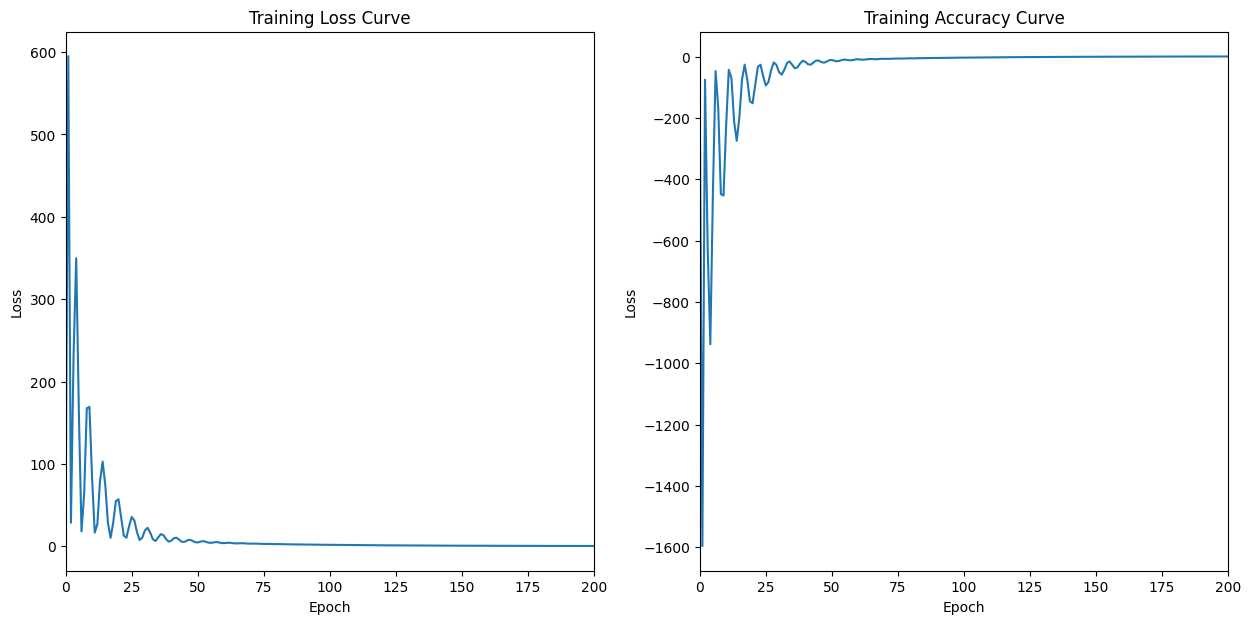

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,7))

# plot loss curve
# plot on the first subplot
axs[0].plot(train_loss)
#axs[0].plot(test_outputs)
axs[0].set_title('Training Loss Curve')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_xlim(0, 200)

# plot accuracy curve
# plot on the second subplot
axs[1].plot(train_accuracy)
#axs[1].plot(test_accuracy)
axs[1].set_title('Training Accuracy Curve')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_xlim(0, 200)
plt.show()

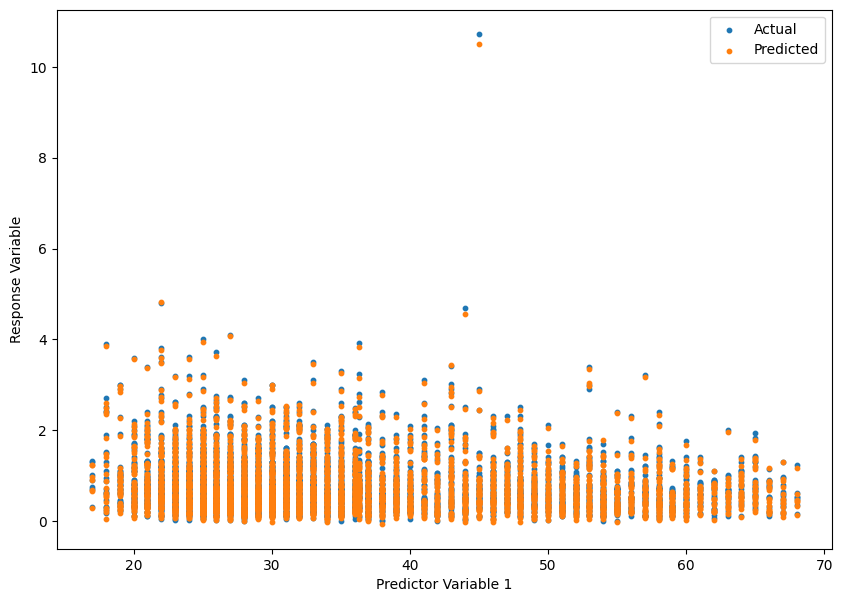

In [ ]:
import matplotlib.pyplot as plt

fig = plt.subplots(figsize=(10,7))
plt.scatter(X_test[:, 0], y_test, s=10, label='Actual')
plt.scatter(X_test[:, 0], y_pred.numpy(), s=10, label='Predicted')
plt.xlabel('Predictor Variable 1')
plt.ylabel('Response Variable')
plt.legend()
plt.show()

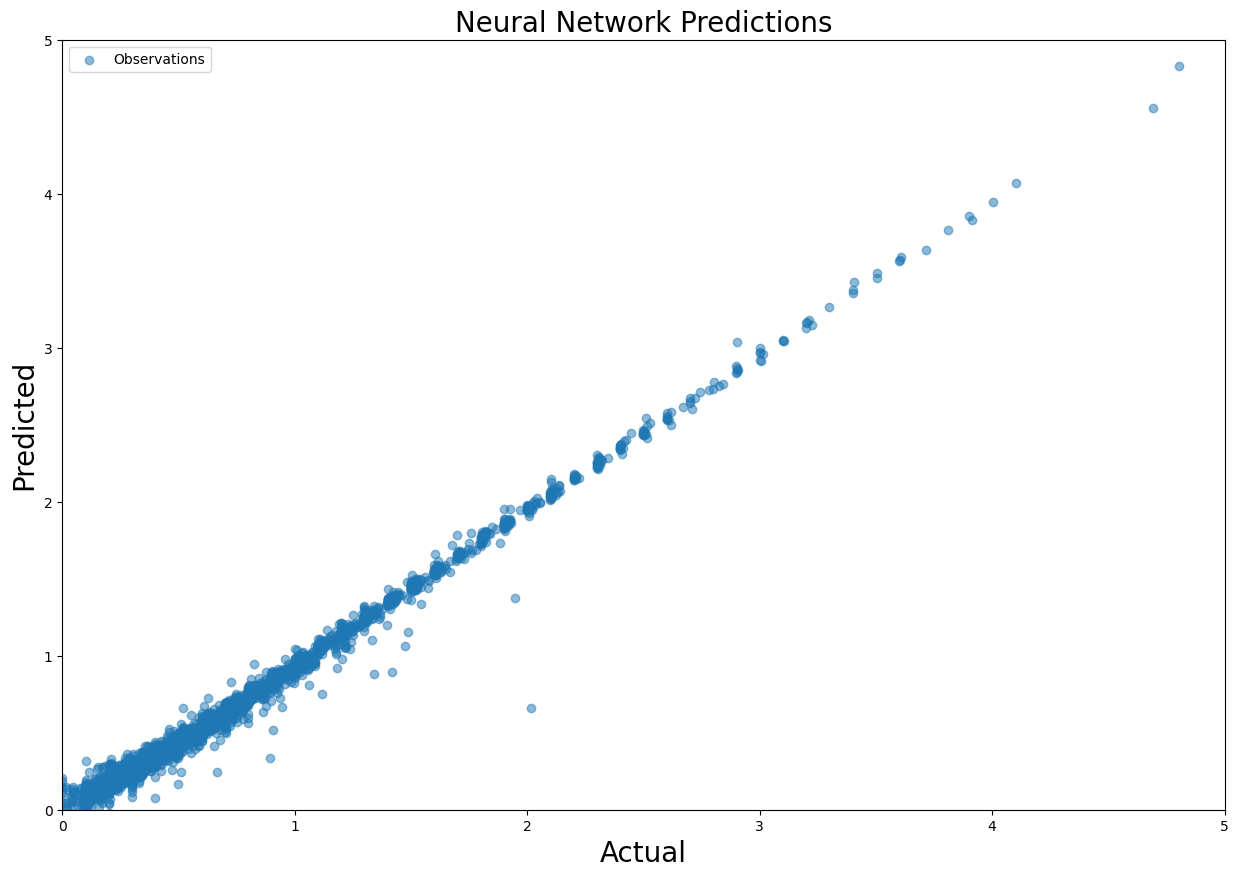

In [ ]:
import matplotlib.pyplot as plt

# get predicted values from the model
with torch.no_grad():
    predicted = model(X_test)

# convert tensor to numpy array
predicted = predicted.numpy()

fig = plt.subplots(figsize=(15,10))
# plot actual vs predicted values
plt.scatter(y_test, predicted, alpha=0.5, label='Observations')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('Actual',size=20)
plt.ylabel('Predicted',size=20)
plt.title('Neural Network Predictions',size=20)
plt.legend()
plt.show()

In [ ]:
# num_epochs = 50000

# for epoch in range(num_epochs):
#     # Forward pass
#     outputs = model(X_train)
#     loss = criterion(outputs, y_train.unsqueeze(1))
    
#     # Backward and optimize
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
    
#     if (epoch+1) % 100 == 0:
#         print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [ ]:
with torch.no_grad():
    y_pred = model(X_test)
    test_loss = criterion(y_pred, y_test.unsqueeze(1))
    print('Test Loss: {:.4f}'.format(test_loss.item()))

r2_score = 1 - (test_loss.item() / y_test.var())
print('R Squared: {:.4f}'.format(r2_score))

Test Loss: 0.0052
R Squared: 0.9854


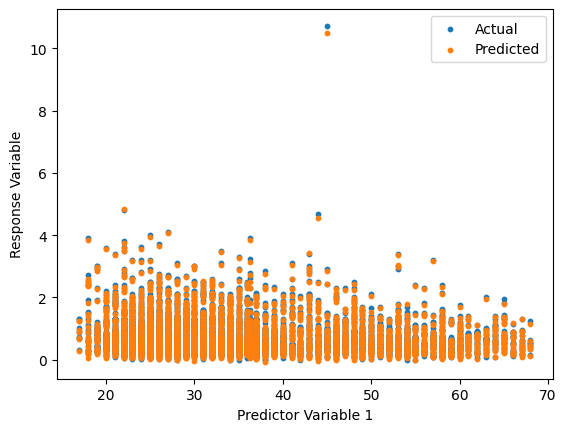

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test, s=10, label='Actual')
plt.scatter(X_test[:, 0], y_pred.numpy(), s=10, label='Predicted')
plt.xlabel('Predictor Variable 1')
plt.ylabel('Response Variable')
plt.legend()
plt.show()

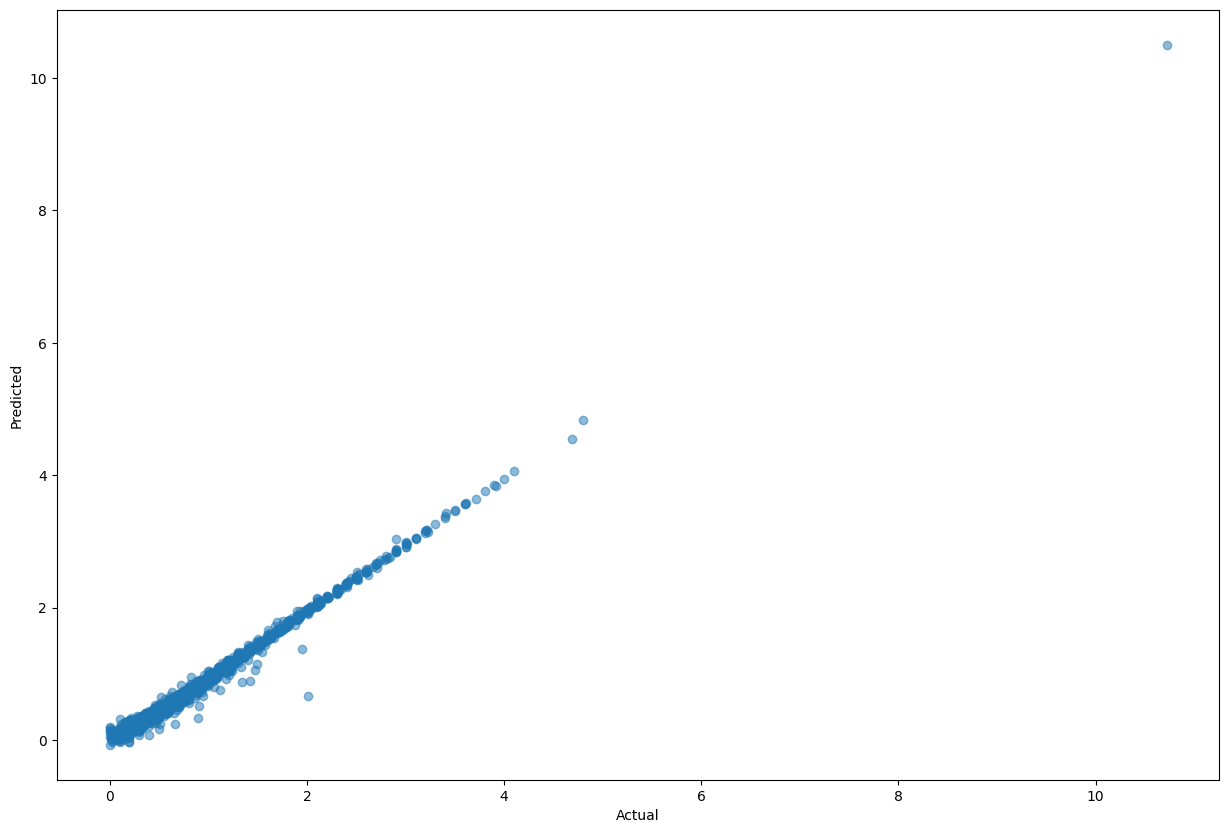

In [ ]:
import matplotlib.pyplot as plt

# get predicted values from the model
with torch.no_grad():
    predicted = model(X_test)

# convert tensor to numpy array
predicted = predicted.numpy()

fig = plt.subplots(figsize=(15,10))
# plot actual vs predicted values
plt.scatter(y_test, predicted, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()